<h1> Opgave I. Download filen ”Invest i værdipapirer”</h1>
Alle tabeller og søjlediagrammer skal indsættes i teksfil ”Dagens opgaver” under de forskelige spørgsmål. <br>
Svar på følgende spørgsmål: <br>
1) Hvor mange invester i værdipairer? (beregn frekvenser og tilføj lagkagefigur)<br>
2) Beregn frekvenser for de forskellige uddannelser (illustrer med søjlediagram)<br>
3) Beregn andel af HHX’er, som har værdipapirer<br>
4) Er der sammenhæng mellem uddannelsesniveau og om man invester i værdipapirer? (illustrer med søjlediagram)<br>
5) Er der sammenhæng mellem alder og hvor meget man har investeret?<br>
    
    

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns',50)

In [72]:
df = pd.read_excel("./Invest værdipapirer.xlsx","Complete")

In [50]:
df.shape #Shows rows and columns - (rows, columns = 184, 11)

(184, 11)

In [51]:
df.head() #Shows the top 5 rows and all columns(or alternativly choose top val)

,Hvad er din alder?,Angiv din adgangsgivende eksamen til din nuværende uddannelse,"Ejer du i dag værdipapirer, som f.eks. aktier og/eller obligationer?",Hvad er værdien af din portefølje i kr.?,Hvorfor investerer du ikke i værdipapirer?,E-mail,Samlet status - Ny,Samlet status - Distribueret,Samlet status - Nogen svar,Samlet status - Gennemført,Samlet status - Frafaldet
0,20 - 21,STX (Almen studentereksamen),Nej,NaN,Har ikke råd,NaN,0,0,0,1,0
1,22 - 23,HHX,Ja,1001 - 5000 kr.,NaN,NaN,0,0,0,1,0
2,24 eller mere,STX (Almen studentereksamen),Nej,NaN,Mangler viden om det,NaN,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
4,22 - 23,HHX,Ja,10.001 kr eller mere,NaN,NaN,0,0,0,1,0


In [52]:
df.columns #Shows all the column names. Good for cleanup columns later

Index(['Hvad er din alder?',
       'Angiv din adgangsgivende eksamen til din nuværende uddannelse',
       'Ejer du i dag værdipapirer, som f.eks. aktier og/eller obligationer?',
       'Hvad er værdien af din portefølje i kr.?',
       'Hvorfor investerer du ikke i værdipapirer?', 'E-mail',
       'Samlet status - Ny', 'Samlet status - Distribueret',
       'Samlet status - Nogen svar', 'Samlet status - Gennemført',
       'Samlet status - Frafaldet'],
      dtype='object')

In [53]:
df.dtypes #Shows the columns datatypes. Good for cleanup columns later

#df['Hvad er værdien af din portefølje i kr.?'] = pd.to_numeric(df['Hvad er værdien af din portefølje i kr.?'] #changes it from string to int64
# pd.to_datetime(df['date'] #Changes it from object to date type

Hvad er din alder?                                                       object
Angiv din adgangsgivende eksamen til din nuværende uddannelse            object
Ejer du i dag værdipapirer, som f.eks. aktier og/eller obligationer?     object
Hvad er værdien af din portefølje i kr.?                                 object
Hvorfor investerer du ikke i værdipapirer?                               object
E-mail                                                                  float64
Samlet status - Ny                                                        int64
Samlet status - Distribueret                                              int64
Samlet status - Nogen svar                                                int64
Samlet status - Gennemført                                                int64
Samlet status - Frafaldet                                                 int64
dtype: object

In [54]:
df.describe() #Shows a statistical 'description' of all data types = float and int 

,E-mail,Samlet status - Ny,Samlet status - Distribueret,Samlet status - Nogen svar,Samlet status - Gennemført,Samlet status - Frafaldet
count,0.0,184.0,184.000000,184.000000,184.000000,184.0
mean,NaN,0.0,0.114130,0.010870,0.875000,0.0
std,NaN,0.0,0.318837,0.103972,0.331621,0.0
min,NaN,0.0,0.000000,0.000000,0.000000,0.0
25%,NaN,0.0,0.000000,0.000000,1.000000,0.0
50%,NaN,0.0,0.000000,0.000000,1.000000,0.0
75%,NaN,0.0,0.000000,0.000000,1.000000,0.0
max,NaN,0.0,1.000000,1.000000,1.000000,0.0


<h1>Sortere kolumnner fra</h1>

In [73]:
df = df[[
       'Hvad er din alder?',
       'Angiv din adgangsgivende eksamen til din nuværende uddannelse',
       'Ejer du i dag værdipapirer, som f.eks. aktier og/eller obligationer?',
       'Hvad er værdien af din portefølje i kr.?',
       'Hvorfor investerer du ikke i værdipapirer?', 
       # 'E-mail',
       # 'Samlet status - Ny', 'Samlet status - Distribueret',
       # 'Samlet status - Nogen svar', 'Samlet status - Gennemført',
       # 'Samlet status - Frafaldet'
   ]].copy()

# df.drop(['Hvad er din alder?'], axis=1) #delete column (axis=1 == column)

In [132]:
df = df.rename(columns={'Hvad er din alder?':'alder',
       'Angiv din adgangsgivende eksamen til din nuværende uddannelse':'uddannelse',
       'Ejer du i dag værdipapirer, som f.eks. aktier og/eller obligationer?':'ejer_værdipapir',
        'Hvad er værdien af din portefølje i kr.?':'værdi',
       'Hvorfor investerer du ikke i værdipapirer?':'hvorfor?'})

<h2>1) Hvor mange invester i værdipairer? (beregn frekvenser og tilføj lagkagefigur)</h2>

In [190]:
val = df['ejer_værdipapir'].value_counts()/df['ejer_værdipapir'].count()

In [270]:
for x in val:
    value=str('%.2f' % (x*100))+'%' #Change the value to .00 desimals and multiply by 100 and add a % and make it a string
    print(value)

50.31%
49.69%


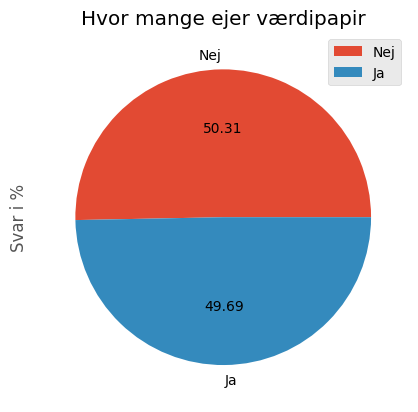

In [267]:
ax = (df['ejer_værdipapir'].value_counts()\
    /df['ejer_værdipapir'].count())\
    .plot(kind='pie', title='Hvor mange ejer værdipapir', autopct='%.2f')
ax.set_ylabel('Svar i %')
ax.legend()
ax.plot()
plt.show()

<h2>2) Beregn frekvenser for de forskellige uddannelser (illustrer med søjlediagram)</h2><br>

In [338]:
uddval = df['uddannelse'].value_counts(normalize=True)
uddval

HHX                             0.453416
STX (Almen studentereksamen)    0.335404
HF                              0.086957
Andet                           0.074534
HTX                             0.049689
Name: uddannelse, dtype: float64

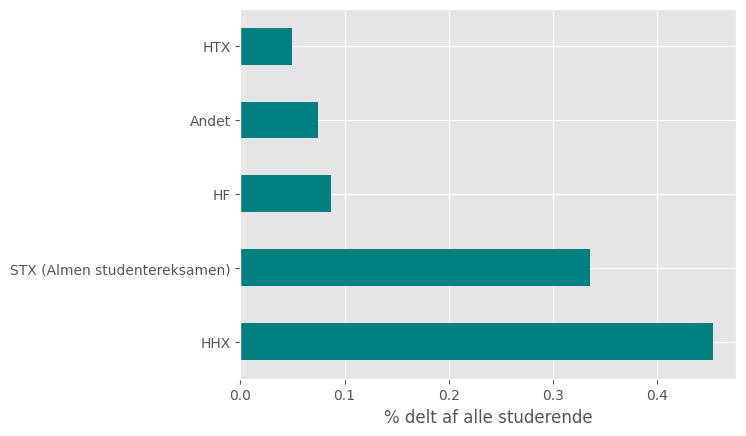

In [366]:
uddan = df['uddannelse'].value_counts(normalize=True)\
                        .plot(kind='barh', color='teal')
for x in uddan.containers:
    plt.labels = uddval
    
plt.xlabel('% delt af alle studerende')
plt.show()

<h2>3) Beregn andel af HHX’er, som har værdipapirer</h2><br>

In [416]:
nejfilter = df[df['ejer_værdipapir'] == "Ja"].copy()

In [426]:
nejfilter['uddannelse'].value_counts(normalize=True)

HHX                             0.5125
STX (Almen studentereksamen)    0.2875
Andet                           0.0875
HF                              0.0625
HTX                             0.0500
Name: uddannelse, dtype: float64

<h2>4) Er der sammenhæng mellem uddannelsesvalg og om man invester i værdipapirer? (illustrer med søjlediagram)</h2><br>

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
x = uddanelser
y = data

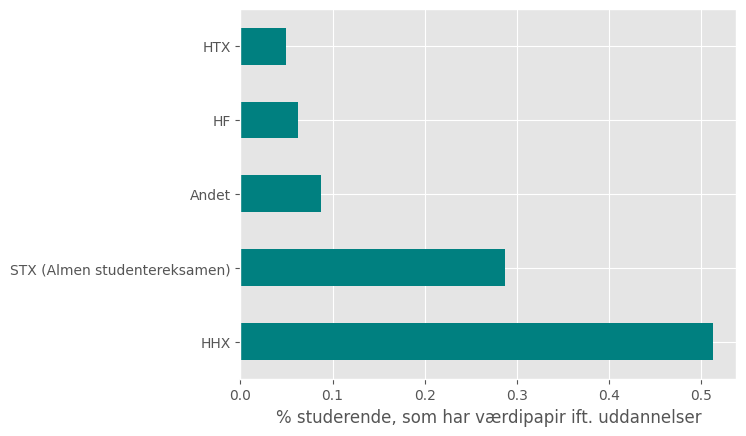

In [432]:
nejfilter['uddannelse'].value_counts(normalize=True)\
                       .plot(kind='barh',color='teal')
plt.xlabel('% studerende, som har værdipapir ift. uddannelser')
plt.show()

<h2>5) Er der sammenhæng mellem alder og hvor meget man har investeret?</h2><br>

In [441]:
værdi = df[~df['værdi'].isnull()]

In [467]:
værdi = værdi.drop('ejer_værdipapir', axis=1)

<AxesSubplot: xlabel='alder,værdi'>

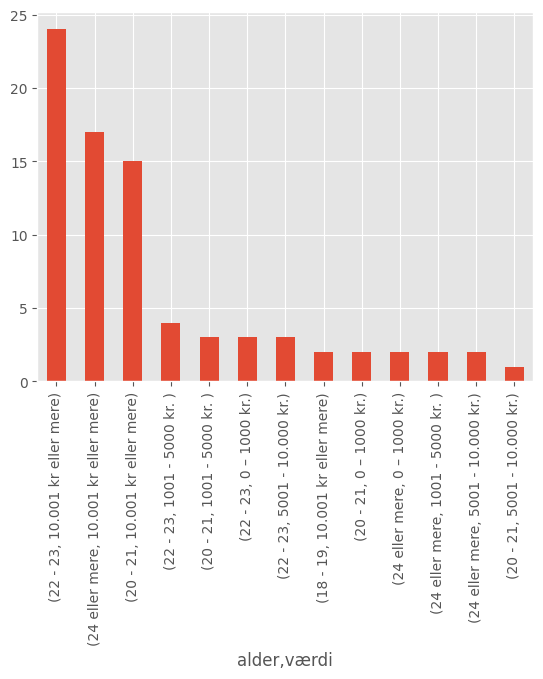

In [472]:
værdi.value_counts().plot(kind='bar')